In [6]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR

# データ読込
train = pd.read_csv("./train.csv")
pred = pd.read_csv("./test.csv")

# 特徴量抽出
train = train.loc[:,["MSZoning", "MSSubClass","LotFrontage","LotArea","OverallQual","OverallCond", "YearBuilt","YearRemodAdd","MasVnrArea","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF", "GrLivArea", "TotRmsAbvGrd","GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "SalePrice"]]
pred = pred.loc[:,["Id","MSZoning", "MSSubClass","LotFrontage","LotArea","OverallQual","OverallCond", "YearBuilt","YearRemodAdd","MasVnrArea","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF", "GrLivArea", "TotRmsAbvGrd","GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF"]]

# 欠損値を埋める
train.fillna({"LotFrontage": train["LotFrontage"].median()}, inplace = True)
train.fillna({"MasVnrArea": 0}, inplace = True)
pred.fillna({"MSZoning": "RL"}, inplace = True)
pred.fillna({"LotFrontage": train["LotFrontage"].median()}, inplace = True)
pred.fillna({"MasVnrArea": 0}, inplace = True)
pred.fillna({"BsmtUnfSF": 0}, inplace = True)
pred.fillna({"TotalBsmtSF": 0}, inplace = True)
pred.fillna({"GarageCars": 0}, inplace = True)
pred.fillna({"GarageArea": 0}, inplace = True)

# 数値変換
for column in ["MSSubClass"]:
    le = LabelEncoder()
    le.fit(train[column])
    train[column] = le.transform(train[column])
    pred[column] = le.transform(pred[column])

# 標準化
# for column in ["MSSubClass", "LotFrontage", "LotArea", "MasVnrArea"]:
#     ss = StandardScaler()
#     ss.fit(train[column].values.reshape(-1, 1))
#     train[column] = ss.transform(train[column].values.reshape(-1, 1))
#     pred[column] = ss.transform(pred[column].values.reshape(-1, 1))

# 学習データ作成
X = train.drop("SalePrice", axis=1)
y = train["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 学習
# model = SGDRegressor(max_iter=1000)
# model = LinearRegression()
# model = SVR()
# model = SVR(kernel='linear')
model = xgb.XGBRegressor(objective ='reg:squarederror')
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
print("予測精度", mean_squared_error(y_train, y_train_pred))

# 予測
X_pred = pred.drop("Id", axis=1)
y_pred = model.predict(X_pred)

# 提出
pd.DataFrame({
    "Id": pred["Id"],
    "SalePrice": y_pred,
}).to_csv("submission.csv", index=False)


ValueError: y contains previously unseen labels: [150]

In [176]:
print(pred.isnull().sum())

Id              0
MSSubClass      0
LotFrontage     0
LotArea         0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
BsmtUnfSF       0
TotalBsmtSF     1
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
TotRmsAbvGrd    0
GarageCars      1
GarageArea      1
WoodDeckSF      0
OpenPorchSF     0
dtype: int64


In [78]:
pd.set_option('display.max_columns', 50)

train.head()
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea
0,NaN,60,3,65.0,8450,2003,2003,196.0
1,NaN,20,3,80.0,9600,1976,1976,0.0
2,NaN,60,3,68.0,11250,2001,2002,162.0
3,NaN,70,3,60.0,9550,1915,1970,0.0
4,NaN,60,3,84.0,14260,2000,2000,350.0


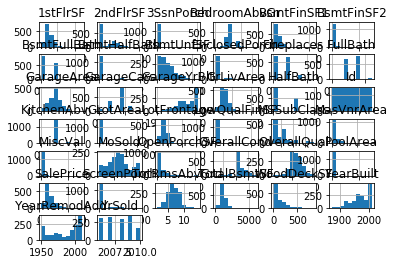

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
train = pd.read_csv("./train.csv")
train = train.drop(["Alley"], axis=1)
# train = train.drop(["Id", "PoolArea"], axis=1)
train.hist()
# plt.tight_layout() # グラフ同士が重ならないようにする関数
plt.show() # グラフの表示

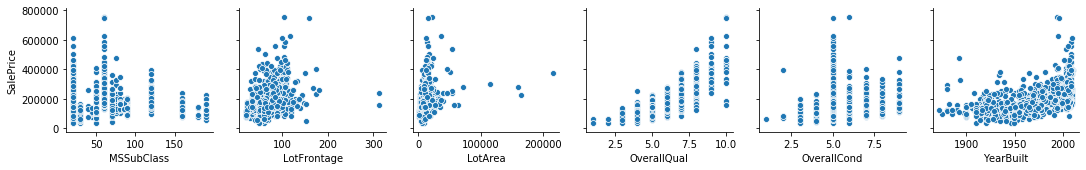

In [145]:
train = pd.read_csv("./train.csv")
pg = sns.pairplot(train, # 入力データ
                  x_vars=["MSSubClass","LotFrontage","LotArea","OverallQual","OverallCond", "YearBuilt","YearRemodAdd","MasVnrArea","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF", "GrLivArea", "TotRmsAbvGrd","GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF"], # x軸のカラム 
                  y_vars=["SalePrice"] # y軸のカラム
                 )

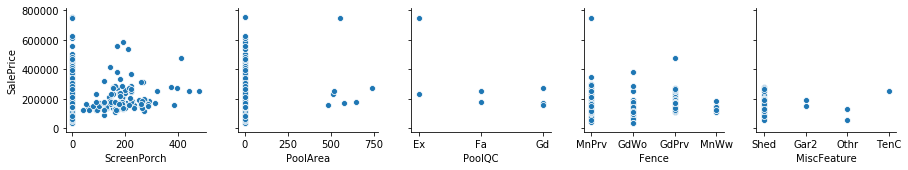

In [159]:
pg = sns.pairplot(train, # 入力データ
                  x_vars=["ScreenPorch","PoolArea","PoolQC","Fence","MiscFeature"], # x軸のカラム 
                  y_vars=["SalePrice"] # y軸のカラム
                 )

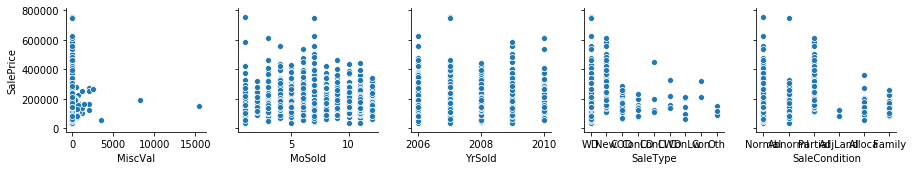

In [161]:
pg = sns.pairplot(train, # 入力データ
                  x_vars=["MiscVal","MoSold","YrSold","SaleType","SaleCondition"], # x軸のカラム 
                  y_vars=["SalePrice"] # y軸のカラム
                 )

In [106]:
import optuna
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
sample = pd.read_csv('./submission.csv')

In [107]:
x = train.loc[:,["MSSubClass","LotFrontage","LotArea","OverallQual","OverallCond", "YearBuilt","YearRemodAdd","MasVnrArea","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF", "GrLivArea", "TotRmsAbvGrd","GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF"]]
y = train['SalePrice']
test_id = test["Id"]
test = test.loc[:,["MSSubClass","LotFrontage","LotArea","OverallQual","OverallCond", "YearBuilt","YearRemodAdd","MasVnrArea","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF", "GrLivArea", "TotRmsAbvGrd","GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF"]]

In [53]:
x_train, x_validation, y_train, y_validation = train_test_split(x, y, train_size=0.8, random_state=0)

In [54]:
model = xgb.XGBRegressor()
model.fit(x_train, y_train)

[23:43:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [70]:
y_pred = model.predict(test)

In [77]:
pd.DataFrame({
    "Id": test_id,
    "SalePrice": y_pred,
}).to_csv("submission.csv", index=False)

In [80]:
xgb.XGBRegressor()

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [88]:
import optuna
from sklearn.metrics import mean_squared_error

def objective(trial):
    # ハイパーパラメータ
    base_score = trial.suggest_uniform("base_score", 0.01, 0.5)
    gamma = trial.suggest_uniform("gamma", 0.0, 1.0)
    eta = trial.suggest_uniform("eta", 0.01, 0.2)
    learning_rate = trial.suggest_uniform(" learning_rate", 0.1, 1.0)
    max_depth = trial.suggest_int("max_depth", 2, 100)
    subsample = trial.suggest_uniform("subsample", 0.5, 1.0)
    colsample_bytree = trial.suggest_uniform("colsample_bytree", 0.5, 1.0)
    n_estimators = trial.suggest_int("n_estimators", 2, 100)
    reg_lambda=trial.suggest_uniform("reg_lambda", 0.0, 10.0)
    
    # 学習
    model = xgb.XGBRegressor(
        base_score=base_score,
        gamma=gamma,
        eta=eta,
        learning_rate=learning_rate,
        max_depth=max_depth,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        n_estimators=n_estimators,
        reg_lambda=reg_lambda,
    )
    model.fit(x_train, y_train)

    # 予測
    y_pred = model.predict(x_validation)
    return np.sqrt(mean_squared_error(y_validation, y_pred))

In [100]:
study = optuna.create_study()
study.optimize(objective, n_trials=100)
print(study.best_params)
print(study.best_value)

[00:13:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:13:41,477] Finished trial#0 resulted in value: 37632.05141494107. Current best value is 37632.05141494107 with parameters: {'base_score': 0.23480116797737371, 'gamma': 0.16715911442623832, 'eta': 0.06606688856695778, ' learning_rate': 0.6962128387159295, 'max_depth': 83, 'subsample': 0.697429550758027, 'colsample_bytree': 0.9847537070835892, 'n_estimators': 89, 'reg_lambda': 8.098706897231011}.


[00:13:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:13:41,963] Finished trial#1 resulted in value: 34625.16108152583. Current best value is 34625.16108152583 with parameters: {'base_score': 0.06828007854271528, 'gamma': 0.1951315278321667, 'eta': 0.025080183874386833, ' learning_rate': 0.1838569419823957, 'max_depth': 75, 'subsample': 0.61725632074825, 'colsample_bytree': 0.9298874335727907, 'n_estimators': 42, 'reg_lambda': 9.264120120441993}.


[00:13:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:13:42,420] Finished trial#2 resulted in value: 30745.787836567357. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:13:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:13:42,943] Finished trial#3 resulted in value: 34555.18999752176. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:13:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:13:43,077] Finished trial#4 resulted in value: 47585.41678655872. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:13:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:13:43,714] Finished trial#5 resulted in value: 33162.81946378467. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:13:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:13:44,408] Finished trial#6 resulted in value: 33914.567402716326. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:13:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:13:45,654] Finished trial#7 resulted in value: 36258.410116032166. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:13:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:13:45,838] Finished trial#8 resulted in value: 39333.77576939796. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:13:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:13:46,210] Finished trial#9 resulted in value: 39476.106030405506. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:13:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:13:46,500] Finished trial#10 resulted in value: 33032.10959536429. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:13:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:13:46,806] Finished trial#11 resulted in value: 31533.387978956907. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:13:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:13:47,238] Finished trial#12 resulted in value: 35996.35661883749. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:13:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:13:47,486] Finished trial#13 resulted in value: 42377.65708451339. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:13:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:13:48,152] Finished trial#14 resulted in value: 35317.204523068125. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:13:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:13:48,686] Finished trial#15 resulted in value: 33632.70815835193. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:13:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:13:50,044] Finished trial#16 resulted in value: 35173.73519941716. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:13:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:13:50,323] Finished trial#17 resulted in value: 33964.25322414616. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:13:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:13:51,218] Finished trial#18 resulted in value: 56454.47124465553. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:13:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:13:51,538] Finished trial#19 resulted in value: 42056.858829746736. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:13:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:13:51,841] Finished trial#20 resulted in value: 34296.93780220855. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:13:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:13:52,095] Finished trial#21 resulted in value: 32351.141981636054. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:13:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:13:52,561] Finished trial#22 resulted in value: 31261.90567701994. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:13:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:13:53,136] Finished trial#23 resulted in value: 33942.71203556538. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:13:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:13:53,505] Finished trial#24 resulted in value: 32642.061325233386. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:13:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:13:54,323] Finished trial#25 resulted in value: 34717.71096689571. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:13:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:13:54,785] Finished trial#26 resulted in value: 39341.48057543342. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:13:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:13:55,012] Finished trial#27 resulted in value: 33823.91340085256. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:13:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:13:55,767] Finished trial#28 resulted in value: 33587.28289231883. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:13:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:13:56,498] Finished trial#29 resulted in value: 32175.643471197713. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:13:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:13:57,383] Finished trial#30 resulted in value: 33443.11063254203. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:13:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:13:57,995] Finished trial#31 resulted in value: 31992.846590202586. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:13:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:13:58,283] Finished trial#32 resulted in value: 36191.23737159291. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:13:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:13:59,161] Finished trial#33 resulted in value: 34285.92866859468. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:13:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:13:59,643] Finished trial#34 resulted in value: 40105.87697901906. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:13:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:00,195] Finished trial#35 resulted in value: 32816.63481500282. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:14:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:00,981] Finished trial#36 resulted in value: 35761.95263267441. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:14:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:02,080] Finished trial#37 resulted in value: 31370.629075912922. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:14:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:02,866] Finished trial#38 resulted in value: 35121.11221476579. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:14:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:03,896] Finished trial#39 resulted in value: 32089.514123825975. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:14:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:05,072] Finished trial#40 resulted in value: 39749.89990679125. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:14:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:06,997] Finished trial#41 resulted in value: 38219.266913138556. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:14:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:07,726] Finished trial#42 resulted in value: 32962.07101455693. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:14:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:08,819] Finished trial#43 resulted in value: 31675.158510297395. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:14:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:09,377] Finished trial#44 resulted in value: 37654.11346567065. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:14:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:10,445] Finished trial#45 resulted in value: 33767.19526813316. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:14:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:11,415] Finished trial#46 resulted in value: 31425.80696460574. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:14:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:12,546] Finished trial#47 resulted in value: 34417.612611468925. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:14:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:14,947] Finished trial#48 resulted in value: 37322.804900507916. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:14:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:16,066] Finished trial#49 resulted in value: 36139.84516109868. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:14:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:17,214] Finished trial#50 resulted in value: 34198.27002535593. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:14:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:18,273] Finished trial#51 resulted in value: 33362.775441949896. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:14:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:19,885] Finished trial#52 resulted in value: 31917.074728236137. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:14:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:21,170] Finished trial#53 resulted in value: 32834.51172875223. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:14:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:21,994] Finished trial#54 resulted in value: 35364.80271037992. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:14:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:23,004] Finished trial#55 resulted in value: 34478.82401162353. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:14:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:24,068] Finished trial#56 resulted in value: 36026.67487918454. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:14:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:24,606] Finished trial#57 resulted in value: 37730.96656902832. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:14:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:25,032] Finished trial#58 resulted in value: 37437.94519560282. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:14:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:25,456] Finished trial#59 resulted in value: 39582.84422004416. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:14:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:26,432] Finished trial#60 resulted in value: 34482.30863443346. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:14:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:27,891] Finished trial#61 resulted in value: 33556.51286640275. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:14:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:29,147] Finished trial#62 resulted in value: 32864.560343945624. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:14:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:30,190] Finished trial#63 resulted in value: 33655.63178249375. Current best value is 30745.787836567357 with parameters: {'base_score': 0.390169082247936, 'gamma': 0.5112305815722086, 'eta': 0.15438150992701377, ' learning_rate': 0.14164950993417458, 'max_depth': 18, 'subsample': 0.6584126893537268, 'colsample_bytree': 0.5975819851649184, 'n_estimators': 41, 'reg_lambda': 0.768882680317281}.


[00:14:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:31,523] Finished trial#64 resulted in value: 30712.485485328856. Current best value is 30712.485485328856 with parameters: {'base_score': 0.012945123343789527, 'gamma': 0.30445800669221873, 'eta': 0.08495735980304947, ' learning_rate': 0.209898269855497, 'max_depth': 29, 'subsample': 0.8618687129957122, 'colsample_bytree': 0.926817803785415, 'n_estimators': 96, 'reg_lambda': 7.79889170006409}.


[00:14:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:32,781] Finished trial#65 resulted in value: 32065.498142317654. Current best value is 30712.485485328856 with parameters: {'base_score': 0.012945123343789527, 'gamma': 0.30445800669221873, 'eta': 0.08495735980304947, ' learning_rate': 0.209898269855497, 'max_depth': 29, 'subsample': 0.8618687129957122, 'colsample_bytree': 0.926817803785415, 'n_estimators': 96, 'reg_lambda': 7.79889170006409}.


[00:14:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:33,519] Finished trial#66 resulted in value: 32678.951341953132. Current best value is 30712.485485328856 with parameters: {'base_score': 0.012945123343789527, 'gamma': 0.30445800669221873, 'eta': 0.08495735980304947, ' learning_rate': 0.209898269855497, 'max_depth': 29, 'subsample': 0.8618687129957122, 'colsample_bytree': 0.926817803785415, 'n_estimators': 96, 'reg_lambda': 7.79889170006409}.


[00:14:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:34,351] Finished trial#67 resulted in value: 31903.41895555648. Current best value is 30712.485485328856 with parameters: {'base_score': 0.012945123343789527, 'gamma': 0.30445800669221873, 'eta': 0.08495735980304947, ' learning_rate': 0.209898269855497, 'max_depth': 29, 'subsample': 0.8618687129957122, 'colsample_bytree': 0.926817803785415, 'n_estimators': 96, 'reg_lambda': 7.79889170006409}.


[00:14:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:35,581] Finished trial#68 resulted in value: 35452.9389872261. Current best value is 30712.485485328856 with parameters: {'base_score': 0.012945123343789527, 'gamma': 0.30445800669221873, 'eta': 0.08495735980304947, ' learning_rate': 0.209898269855497, 'max_depth': 29, 'subsample': 0.8618687129957122, 'colsample_bytree': 0.926817803785415, 'n_estimators': 96, 'reg_lambda': 7.79889170006409}.


[00:14:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:36,168] Finished trial#69 resulted in value: 31808.427412468733. Current best value is 30712.485485328856 with parameters: {'base_score': 0.012945123343789527, 'gamma': 0.30445800669221873, 'eta': 0.08495735980304947, ' learning_rate': 0.209898269855497, 'max_depth': 29, 'subsample': 0.8618687129957122, 'colsample_bytree': 0.926817803785415, 'n_estimators': 96, 'reg_lambda': 7.79889170006409}.


[00:14:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:37,449] Finished trial#70 resulted in value: 34188.925176298326. Current best value is 30712.485485328856 with parameters: {'base_score': 0.012945123343789527, 'gamma': 0.30445800669221873, 'eta': 0.08495735980304947, ' learning_rate': 0.209898269855497, 'max_depth': 29, 'subsample': 0.8618687129957122, 'colsample_bytree': 0.926817803785415, 'n_estimators': 96, 'reg_lambda': 7.79889170006409}.


[00:14:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:37,846] Finished trial#71 resulted in value: 31847.289184203175. Current best value is 30712.485485328856 with parameters: {'base_score': 0.012945123343789527, 'gamma': 0.30445800669221873, 'eta': 0.08495735980304947, ' learning_rate': 0.209898269855497, 'max_depth': 29, 'subsample': 0.8618687129957122, 'colsample_bytree': 0.926817803785415, 'n_estimators': 96, 'reg_lambda': 7.79889170006409}.


[00:14:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:38,435] Finished trial#72 resulted in value: 32671.119063734244. Current best value is 30712.485485328856 with parameters: {'base_score': 0.012945123343789527, 'gamma': 0.30445800669221873, 'eta': 0.08495735980304947, ' learning_rate': 0.209898269855497, 'max_depth': 29, 'subsample': 0.8618687129957122, 'colsample_bytree': 0.926817803785415, 'n_estimators': 96, 'reg_lambda': 7.79889170006409}.


[00:14:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:39,056] Finished trial#73 resulted in value: 32775.30459382948. Current best value is 30712.485485328856 with parameters: {'base_score': 0.012945123343789527, 'gamma': 0.30445800669221873, 'eta': 0.08495735980304947, ' learning_rate': 0.209898269855497, 'max_depth': 29, 'subsample': 0.8618687129957122, 'colsample_bytree': 0.926817803785415, 'n_estimators': 96, 'reg_lambda': 7.79889170006409}.


[00:14:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:39,569] Finished trial#74 resulted in value: 36189.873821223126. Current best value is 30712.485485328856 with parameters: {'base_score': 0.012945123343789527, 'gamma': 0.30445800669221873, 'eta': 0.08495735980304947, ' learning_rate': 0.209898269855497, 'max_depth': 29, 'subsample': 0.8618687129957122, 'colsample_bytree': 0.926817803785415, 'n_estimators': 96, 'reg_lambda': 7.79889170006409}.


[00:14:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:40,203] Finished trial#75 resulted in value: 32685.537472103948. Current best value is 30712.485485328856 with parameters: {'base_score': 0.012945123343789527, 'gamma': 0.30445800669221873, 'eta': 0.08495735980304947, ' learning_rate': 0.209898269855497, 'max_depth': 29, 'subsample': 0.8618687129957122, 'colsample_bytree': 0.926817803785415, 'n_estimators': 96, 'reg_lambda': 7.79889170006409}.


[00:14:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:40,951] Finished trial#76 resulted in value: 34861.79481229024. Current best value is 30712.485485328856 with parameters: {'base_score': 0.012945123343789527, 'gamma': 0.30445800669221873, 'eta': 0.08495735980304947, ' learning_rate': 0.209898269855497, 'max_depth': 29, 'subsample': 0.8618687129957122, 'colsample_bytree': 0.926817803785415, 'n_estimators': 96, 'reg_lambda': 7.79889170006409}.


[00:14:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:41,289] Finished trial#77 resulted in value: 35129.008315875544. Current best value is 30712.485485328856 with parameters: {'base_score': 0.012945123343789527, 'gamma': 0.30445800669221873, 'eta': 0.08495735980304947, ' learning_rate': 0.209898269855497, 'max_depth': 29, 'subsample': 0.8618687129957122, 'colsample_bytree': 0.926817803785415, 'n_estimators': 96, 'reg_lambda': 7.79889170006409}.


[00:14:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:42,047] Finished trial#78 resulted in value: 32410.380391694973. Current best value is 30712.485485328856 with parameters: {'base_score': 0.012945123343789527, 'gamma': 0.30445800669221873, 'eta': 0.08495735980304947, ' learning_rate': 0.209898269855497, 'max_depth': 29, 'subsample': 0.8618687129957122, 'colsample_bytree': 0.926817803785415, 'n_estimators': 96, 'reg_lambda': 7.79889170006409}.


[00:14:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:42,751] Finished trial#79 resulted in value: 34384.29092844416. Current best value is 30712.485485328856 with parameters: {'base_score': 0.012945123343789527, 'gamma': 0.30445800669221873, 'eta': 0.08495735980304947, ' learning_rate': 0.209898269855497, 'max_depth': 29, 'subsample': 0.8618687129957122, 'colsample_bytree': 0.926817803785415, 'n_estimators': 96, 'reg_lambda': 7.79889170006409}.


[00:14:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:43,095] Finished trial#80 resulted in value: 32434.260167151155. Current best value is 30712.485485328856 with parameters: {'base_score': 0.012945123343789527, 'gamma': 0.30445800669221873, 'eta': 0.08495735980304947, ' learning_rate': 0.209898269855497, 'max_depth': 29, 'subsample': 0.8618687129957122, 'colsample_bytree': 0.926817803785415, 'n_estimators': 96, 'reg_lambda': 7.79889170006409}.


[00:14:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:43,512] Finished trial#81 resulted in value: 32826.97172290418. Current best value is 30712.485485328856 with parameters: {'base_score': 0.012945123343789527, 'gamma': 0.30445800669221873, 'eta': 0.08495735980304947, ' learning_rate': 0.209898269855497, 'max_depth': 29, 'subsample': 0.8618687129957122, 'colsample_bytree': 0.926817803785415, 'n_estimators': 96, 'reg_lambda': 7.79889170006409}.


[00:14:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:44,104] Finished trial#82 resulted in value: 34015.83444659211. Current best value is 30712.485485328856 with parameters: {'base_score': 0.012945123343789527, 'gamma': 0.30445800669221873, 'eta': 0.08495735980304947, ' learning_rate': 0.209898269855497, 'max_depth': 29, 'subsample': 0.8618687129957122, 'colsample_bytree': 0.926817803785415, 'n_estimators': 96, 'reg_lambda': 7.79889170006409}.


[00:14:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:44,596] Finished trial#83 resulted in value: 30271.3448225493. Current best value is 30271.3448225493 with parameters: {'base_score': 0.4484913218094901, 'gamma': 0.2482611941801602, 'eta': 0.031369030053186024, ' learning_rate': 0.17129391063387925, 'max_depth': 6, 'subsample': 0.8586178117820709, 'colsample_bytree': 0.6967307623430357, 'n_estimators': 81, 'reg_lambda': 5.648509228101141}.


[00:14:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:45,005] Finished trial#84 resulted in value: 34438.764864624514. Current best value is 30271.3448225493 with parameters: {'base_score': 0.4484913218094901, 'gamma': 0.2482611941801602, 'eta': 0.031369030053186024, ' learning_rate': 0.17129391063387925, 'max_depth': 6, 'subsample': 0.8586178117820709, 'colsample_bytree': 0.6967307623430357, 'n_estimators': 81, 'reg_lambda': 5.648509228101141}.


[00:14:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:45,817] Finished trial#85 resulted in value: 32670.076674481137. Current best value is 30271.3448225493 with parameters: {'base_score': 0.4484913218094901, 'gamma': 0.2482611941801602, 'eta': 0.031369030053186024, ' learning_rate': 0.17129391063387925, 'max_depth': 6, 'subsample': 0.8586178117820709, 'colsample_bytree': 0.6967307623430357, 'n_estimators': 81, 'reg_lambda': 5.648509228101141}.


[00:14:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:47,005] Finished trial#86 resulted in value: 33742.805423720296. Current best value is 30271.3448225493 with parameters: {'base_score': 0.4484913218094901, 'gamma': 0.2482611941801602, 'eta': 0.031369030053186024, ' learning_rate': 0.17129391063387925, 'max_depth': 6, 'subsample': 0.8586178117820709, 'colsample_bytree': 0.6967307623430357, 'n_estimators': 81, 'reg_lambda': 5.648509228101141}.


[00:14:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:48,455] Finished trial#87 resulted in value: 35131.98723155576. Current best value is 30271.3448225493 with parameters: {'base_score': 0.4484913218094901, 'gamma': 0.2482611941801602, 'eta': 0.031369030053186024, ' learning_rate': 0.17129391063387925, 'max_depth': 6, 'subsample': 0.8586178117820709, 'colsample_bytree': 0.6967307623430357, 'n_estimators': 81, 'reg_lambda': 5.648509228101141}.


[00:14:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:49,444] Finished trial#88 resulted in value: 32016.911571191995. Current best value is 30271.3448225493 with parameters: {'base_score': 0.4484913218094901, 'gamma': 0.2482611941801602, 'eta': 0.031369030053186024, ' learning_rate': 0.17129391063387925, 'max_depth': 6, 'subsample': 0.8586178117820709, 'colsample_bytree': 0.6967307623430357, 'n_estimators': 81, 'reg_lambda': 5.648509228101141}.


[00:14:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:50,074] Finished trial#89 resulted in value: 32815.27041650588. Current best value is 30271.3448225493 with parameters: {'base_score': 0.4484913218094901, 'gamma': 0.2482611941801602, 'eta': 0.031369030053186024, ' learning_rate': 0.17129391063387925, 'max_depth': 6, 'subsample': 0.8586178117820709, 'colsample_bytree': 0.6967307623430357, 'n_estimators': 81, 'reg_lambda': 5.648509228101141}.


[00:14:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:51,088] Finished trial#90 resulted in value: 36769.79906283168. Current best value is 30271.3448225493 with parameters: {'base_score': 0.4484913218094901, 'gamma': 0.2482611941801602, 'eta': 0.031369030053186024, ' learning_rate': 0.17129391063387925, 'max_depth': 6, 'subsample': 0.8586178117820709, 'colsample_bytree': 0.6967307623430357, 'n_estimators': 81, 'reg_lambda': 5.648509228101141}.


[00:14:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:51,484] Finished trial#91 resulted in value: 29658.951444824124. Current best value is 29658.951444824124 with parameters: {'base_score': 0.47752837104071916, 'gamma': 0.1307729026055351, 'eta': 0.025035985642070532, ' learning_rate': 0.20444214269327443, 'max_depth': 6, 'subsample': 0.9513984663480327, 'colsample_bytree': 0.6269914528346765, 'n_estimators': 71, 'reg_lambda': 5.664754731991503}.


[00:14:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:52,200] Finished trial#92 resulted in value: 30809.511789490458. Current best value is 29658.951444824124 with parameters: {'base_score': 0.47752837104071916, 'gamma': 0.1307729026055351, 'eta': 0.025035985642070532, ' learning_rate': 0.20444214269327443, 'max_depth': 6, 'subsample': 0.9513984663480327, 'colsample_bytree': 0.6269914528346765, 'n_estimators': 71, 'reg_lambda': 5.664754731991503}.


[00:14:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:52,918] Finished trial#93 resulted in value: 40104.24017493477. Current best value is 29658.951444824124 with parameters: {'base_score': 0.47752837104071916, 'gamma': 0.1307729026055351, 'eta': 0.025035985642070532, ' learning_rate': 0.20444214269327443, 'max_depth': 6, 'subsample': 0.9513984663480327, 'colsample_bytree': 0.6269914528346765, 'n_estimators': 71, 'reg_lambda': 5.664754731991503}.


[00:14:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:53,441] Finished trial#94 resulted in value: 32653.90363509687. Current best value is 29658.951444824124 with parameters: {'base_score': 0.47752837104071916, 'gamma': 0.1307729026055351, 'eta': 0.025035985642070532, ' learning_rate': 0.20444214269327443, 'max_depth': 6, 'subsample': 0.9513984663480327, 'colsample_bytree': 0.6269914528346765, 'n_estimators': 71, 'reg_lambda': 5.664754731991503}.


[00:14:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:53,807] Finished trial#95 resulted in value: 30855.93349433062. Current best value is 29658.951444824124 with parameters: {'base_score': 0.47752837104071916, 'gamma': 0.1307729026055351, 'eta': 0.025035985642070532, ' learning_rate': 0.20444214269327443, 'max_depth': 6, 'subsample': 0.9513984663480327, 'colsample_bytree': 0.6269914528346765, 'n_estimators': 71, 'reg_lambda': 5.664754731991503}.


[00:14:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:54,093] Finished trial#96 resulted in value: 31545.753107918958. Current best value is 29658.951444824124 with parameters: {'base_score': 0.47752837104071916, 'gamma': 0.1307729026055351, 'eta': 0.025035985642070532, ' learning_rate': 0.20444214269327443, 'max_depth': 6, 'subsample': 0.9513984663480327, 'colsample_bytree': 0.6269914528346765, 'n_estimators': 71, 'reg_lambda': 5.664754731991503}.


[00:14:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:54,449] Finished trial#97 resulted in value: 31494.833930406065. Current best value is 29658.951444824124 with parameters: {'base_score': 0.47752837104071916, 'gamma': 0.1307729026055351, 'eta': 0.025035985642070532, ' learning_rate': 0.20444214269327443, 'max_depth': 6, 'subsample': 0.9513984663480327, 'colsample_bytree': 0.6269914528346765, 'n_estimators': 71, 'reg_lambda': 5.664754731991503}.


[00:14:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:54,841] Finished trial#98 resulted in value: 29227.61567197372. Current best value is 29227.61567197372 with parameters: {'base_score': 0.4340629284594169, 'gamma': 0.02688033346779356, 'eta': 0.020685567095279522, ' learning_rate': 0.21423185478900364, 'max_depth': 5, 'subsample': 0.9717833262768292, 'colsample_bytree': 0.6184952995104502, 'n_estimators': 74, 'reg_lambda': 5.215809989108413}.


[00:14:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2020-02-10 00:14:55,513] Finished trial#99 resulted in value: 30958.828843634157. Current best value is 29227.61567197372 with parameters: {'base_score': 0.4340629284594169, 'gamma': 0.02688033346779356, 'eta': 0.020685567095279522, ' learning_rate': 0.21423185478900364, 'max_depth': 5, 'subsample': 0.9717833262768292, 'colsample_bytree': 0.6184952995104502, 'n_estimators': 74, 'reg_lambda': 5.215809989108413}.


{'base_score': 0.4340629284594169, 'gamma': 0.02688033346779356, 'eta': 0.020685567095279522, ' learning_rate': 0.21423185478900364, 'max_depth': 5, 'subsample': 0.9717833262768292, 'colsample_bytree': 0.6184952995104502, 'n_estimators': 74, 'reg_lambda': 5.215809989108413}
29227.61567197372


In [109]:
# 予測
# model = xgb.XGBRegressor(**study.best_params)
model = xgb.XGBRegressor(
    base_score= 0.3178762042175464, 
    gamma= 0.3527869377847408,
    eta= 0.1996852164084454,
    learning_rate= 0.2093583818946573,
    max_depth= 4,
    subsample=0.9394188016589244,
    colsample_bytree= 0.5129593093271464, 
    n_estimators= 98,
    reg_lambda= 6.037690614076373)
model.fit(x_train, y_train)
y_pred = model.predict(test)

[00:17:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [104]:
33925.72705863169
28969.081202116497

y_pred = model.predict(x_validation)
np.sqrt(mean_squared_error(y_validation, y_pred))

28969.081202116497

In [102]:
study.best_params

{'base_score': 0.4340629284594169,
 'gamma': 0.02688033346779356,
 'eta': 0.020685567095279522,
 ' learning_rate': 0.21423185478900364,
 'max_depth': 5,
 'subsample': 0.9717833262768292,
 'colsample_bytree': 0.6184952995104502,
 'n_estimators': 74,
 'reg_lambda': 5.215809989108413}

In [110]:
# 提出
pd.DataFrame({
    "Id": test_id,
    "SalePrice": y_pred,
}).to_csv("submission.csv", index=False)

In [1]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#bring in the six packs
df_train = pd.read_csv('train.csv')

In [4]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

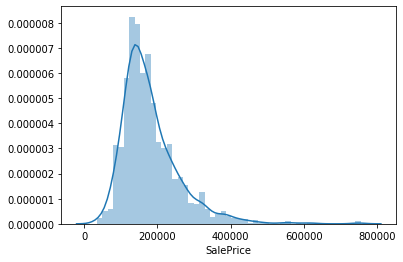

In [5]:
#histogram
sns.distplot(df_train['SalePrice']);

In [6]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


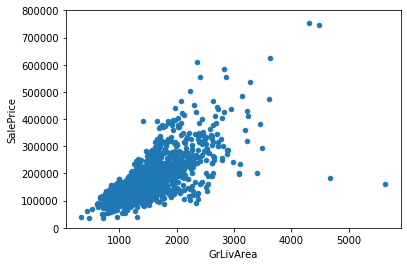

In [7]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

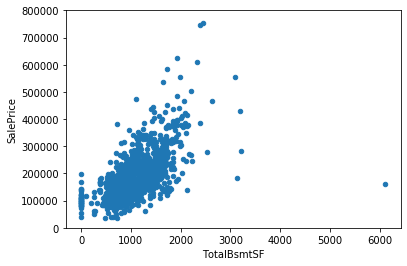

In [8]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

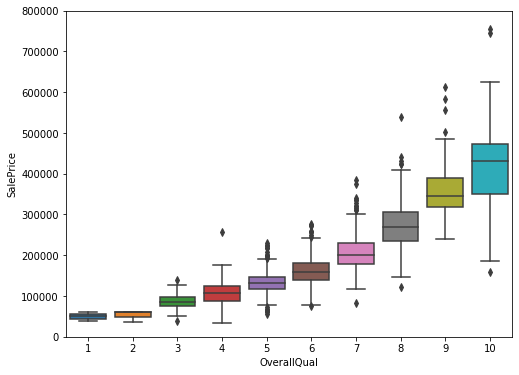

In [9]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

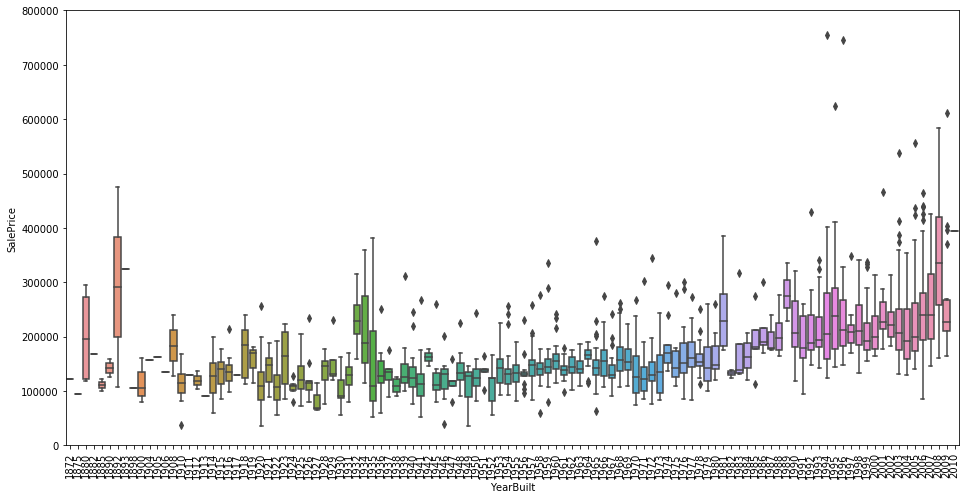

In [10]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

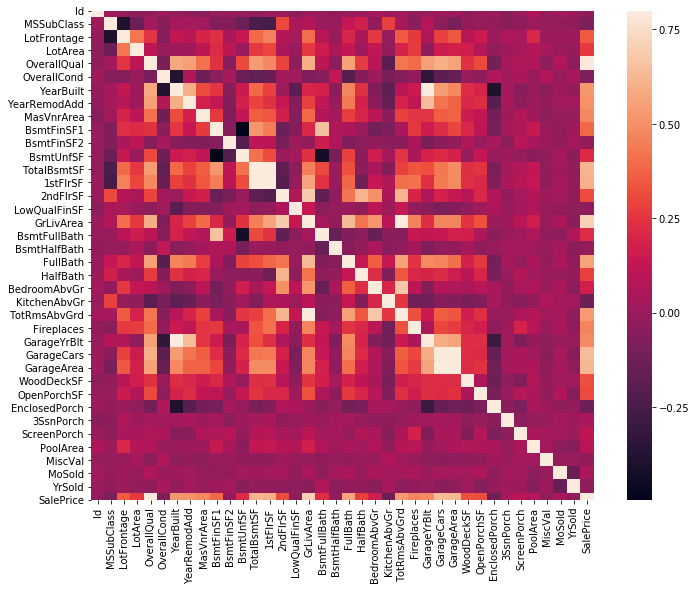

In [11]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

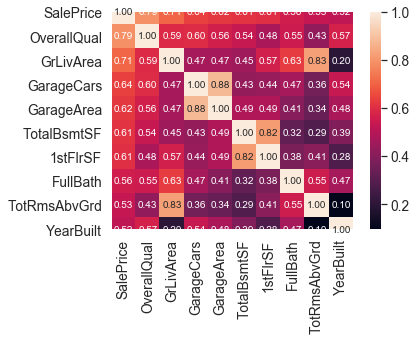

In [12]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

In [14]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [15]:
#dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #just checking that there's no missing data missing...

0

In [16]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


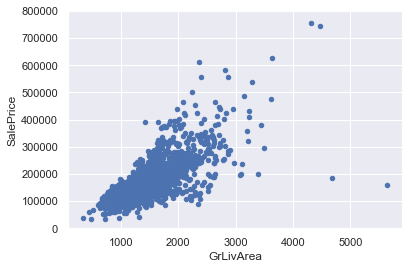

In [17]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [18]:
#deleting points
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


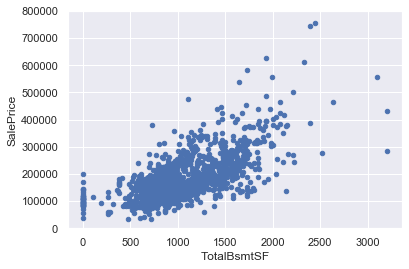

In [19]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

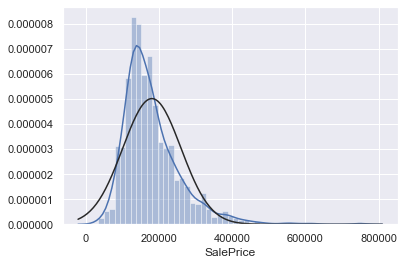

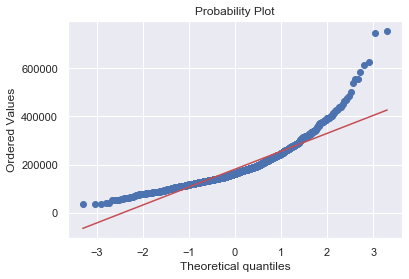

In [20]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

In [21]:
#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

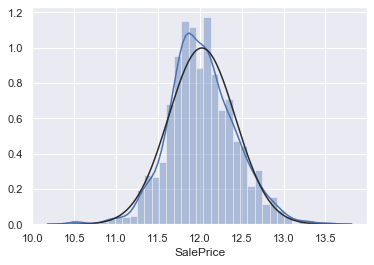

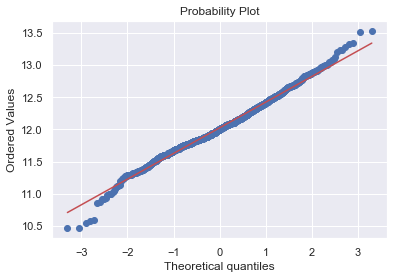

In [22]:
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

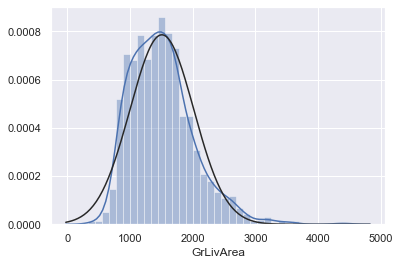

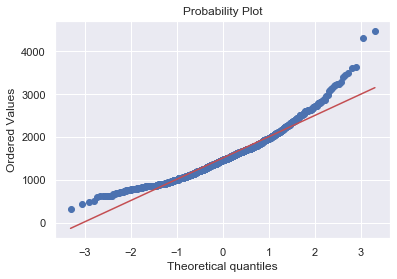

In [23]:
#histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [24]:
#data transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

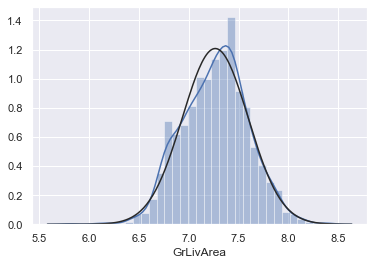

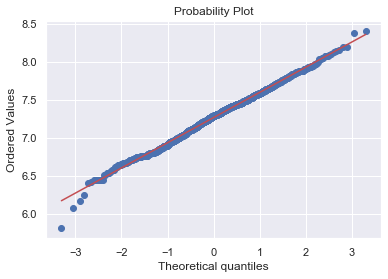

In [25]:
#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

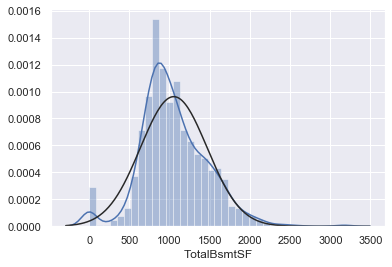

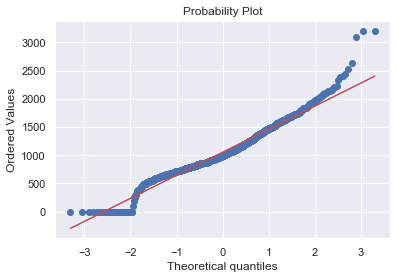

In [26]:
#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

In [27]:
#if area>0 it gets 1, for area==0 it gets 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [28]:
#transform data
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

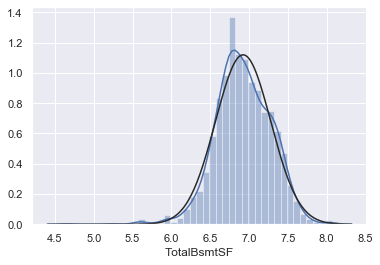

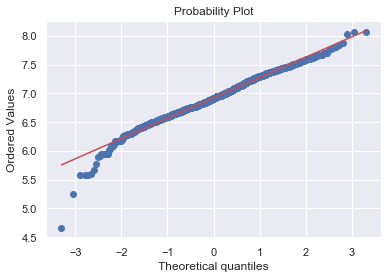

In [29]:
#histogram and normal probability plot
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

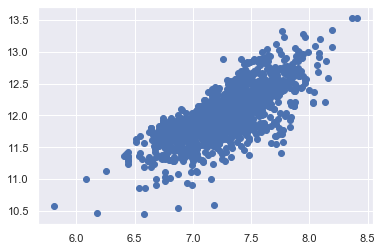

In [30]:
#scatter plot
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

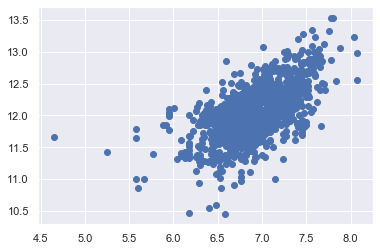

In [31]:
#scatter plot
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);

In [32]:
#convert categorical variable into dummy
df_train = pd.get_dummies(df_train)